# Creating a classification model on real world data of heart disease

In [16]:
# Regular EDA [Exploratory Data Analysis]

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns

# Importing models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import roc_curve 

In [17]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

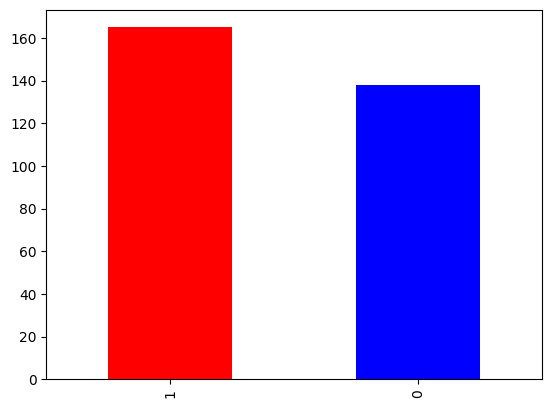

In [19]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);
# df["target"].value_counts().plot(kind="scatter",color=["red","blue"]);


In [20]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


In light of the given data set : 

* By the above cell it is safe to conclude that a woman has a higher probability about 75 %  of having a heart disease as compared to a man 50 %

* Irrespective of the gender anyone having a heart disease is found to be about -> 63 %

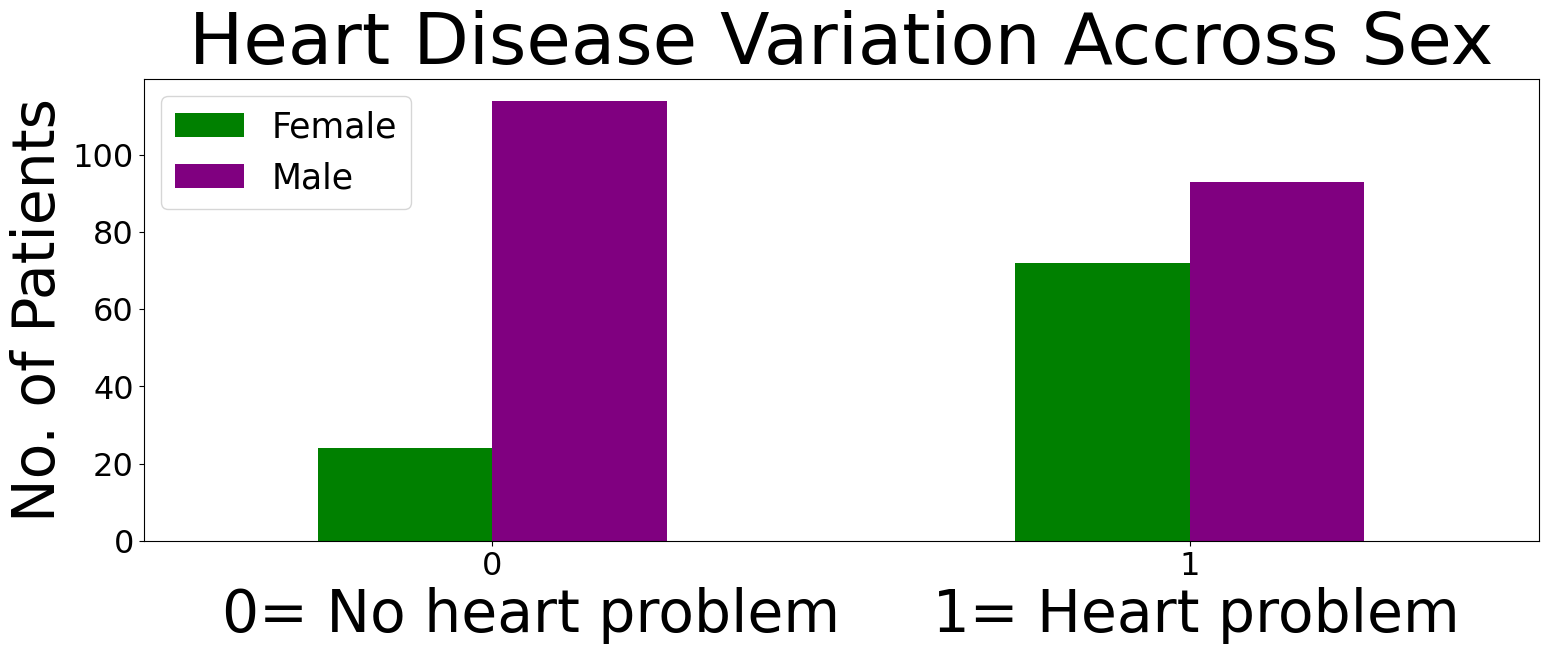

In [23]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize=(18,6),color=["green","purple"],fontsize=23);
plt.title("Heart Disease Variation Accross Sex",fontsize=52);
plt.xlabel("0= No heart problem     1= Heart problem",fontsize=42);
plt.ylabel("No. of Patients",fontsize=42);
plt.legend(["Female","Male"],fontsize=25);
plt.xticks(rotation=0);


In [24]:
x=df.drop("target",axis=1)

In [25]:
y=df["target"]

In [26]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
np.random.seed(42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [29]:
xtest.head(),ytest.head()

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 179   57    1   0       150   276    0        0      112      1      0.6   
 228   59    1   3       170   288    0        0      159      0      0.2   
 111   57    1   2       150   126    1        1      173      0      0.2   
 246   56    0   0       134   409    0        0      150      1      1.9   
 60    71    0   2       110   265    1        0      130      0      0.0   
 
      slope  ca  thal  
 179      1   1     1  
 228      1   0     3  
 111      2   1     3  
 246      1   2     3  
 60       2   1     2  ,
 179    0
 228    0
 111    1
 246    0
 60     1
 Name: target, dtype: int64)